## 01. 套件、模型與影像匯入

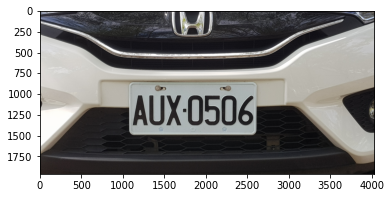

In [36]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

img_path = 'carPlate_sr/P_ (10).jpg' 
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGRA2RGB)) 
plt.show()

detector = cv2.CascadeClassifier("haar_carplate.xml") 

# 手寫CNN
cnn_mnist = load_model('cnn_model.h5')

# 車牌號碼CNN
cnn_carnumber = load_model('cnn_model_car.h5')

mnist_label_name = [i for i in range(10)]
AZ_label_name = [chr(i+65) for i in range(26)]
label_name = np.hstack([mnist_label_name, AZ_label_name])

## 02. 使用車牌辨識Haar分類器與手寫CNN整合應用

In [37]:
signs = detector.detectMultiScale(img, minSize = (76, 20), scaleFactor = 1.1, minNeighbors=8)

if len(signs) > 0:
    for (sx, sy, sw, sh) in signs:
        crop_img = img[sy:sy+sh, sx:sx+sw]
        gray_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
        _, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV)
                              
        save_predict_name = []
        save_contours = []
        contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for i in range(len(contours)):
            (x, y, w, h) = cv2.boundingRect(contours[i])
            save_contours.append((x, y, w, h))
        save_contours = sorted(save_contours, key=lambda x:x[0])
        
        for (x, y, w, h) in save_contours:
            if sw*(3/20)>w>sw*(0.5/20) and sh*(19.5/20)>h>sh*(12/20):
                number = binary_img[y:y+h, x:x+w]
                pad_number = cv2.copyMakeBorder(number, 13, 13, 10, 10, borderType=cv2.BORDER_CONSTANT)
                re_number = cv2.resize(pad_number, (28, 28), interpolation=cv2.INTER_CUBIC)
                intput_number = np.expand_dims(np.expand_dims(re_number.astype('float32')/255,-1),0)
                predict = cnn_mnist.predict(intput_number)
                predict_name = label_name[np.argmax(predict)]
                save_predict_name.append(predict_name)
        print("".join(save_predict_name))
else:
    print('沒有辨識到車牌!')

A4X0506


## 03. 使用車牌辨識Haar分類器與車牌號碼CNN整合應用

In [38]:
signs = detector.detectMultiScale(img, minSize = (76, 20), scaleFactor = 1.1, minNeighbors=8)

if len(signs) > 0:
    for (sx, sy, sw, sh) in signs:
        crop_img = img[sy:sy+sh, sx:sx+sw]
        gray_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
        _, binary_img = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY_INV)

        save_predict_name = []
        save_contours = []
        contours, hierarchy = cv2.findContours(binary_img, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

        for i in range(len(contours)):
            (x, y, w, h) = cv2.boundingRect(contours[i]) 
            save_contours.append((x, y, w, h))
        save_contours = sorted(save_contours, key=lambda x:x[0])
            
        for (x, y, w, h) in save_contours:
            if sw*(3/20)>w>sw*(0.5/20) and sh*(19.5/20)>h>sh*(12/20):
                number = gray_img[y:y+h, x:x+w]
                re_number = cv2.resize(number, (28, 28),interpolation=cv2.INTER_CUBIC) 
                intput_number = np.expand_dims(np.expand_dims(re_number.astype('float32')/255,-1),0) 
                predict = cnn_carnumber.predict(intput_number)
                predict_name = label_name[np.argmax(predict)]
                save_predict_name.append(predict_name) 
        print("".join(save_predict_name))
else: 
    print('沒有辨識到車牌!')

AUXO5O6
